<a href="https://colab.research.google.com/github/mshilpaa/EVA4/blob/master/Session%203/PyTorch101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![PyTorch](https://devblogs.nvidia.com/wp-content/uploads/2017/04/pytorch-logo-dark.png)

An open source machine learning framework that accelerates the path from research prototyping to production deployment.



# Tensor - Pytorch's core data structure

In Python we can create lists, lists of lists, lists of lists and so on. In NumPy there is a `numpy.ndarray` which represents `n`- dimensional array. In math there is a special name for the generalization of vectors and matrices to a higher dimensional space - a tensor

Tensor is an entity with a defined number of dimensions called an order (rank). 

**Scalar** can be considered as a rank-0-tensor. 

**Vector** can be introduced as a rank-1-tensor. 

**Matrices** can be considered as a rank-2-tensor.

# Tensor Basics

Let's import the torch module first.

In [0]:
import numpy as np
import torch

## Tensor Creation
Let's view examples of matrices and tensors generation

2-dimensional (rank-2) tensor of zeros:

In [0]:
(torch.zeros(3, 4)).size()

torch.Size([3, 4])

Random rank-3 tensor:
_read the print below and convince yourself how this is a rank-3-tensor and learn what those 2, 3, 4 values are there for_

In [0]:
torch.rand(2, 3, 4)

tensor([[[0.4527, 0.8047, 0.1790, 0.0405],
         [0.3719, 0.2457, 0.3258, 0.2959],
         [0.4676, 0.7489, 0.2575, 0.2816]],

        [[0.9527, 0.0647, 0.3739, 0.6701],
         [0.1815, 0.2522, 0.5853, 0.5799],
         [0.9247, 0.3664, 0.6367, 0.6719]]])

I am hoping you have noticed 4-elements in a row, 3 rows making one block and there are 2 blocks. 

Random rank-4-tensor:

In [0]:
torch.rand(2, 2, 2, 3)

tensor([[[[0.6854, 0.8092, 0.3993],
          [0.4950, 0.4948, 0.6825]],

         [[0.9659, 0.9548, 0.7385],
          [0.2925, 0.2483, 0.0622]]],


        [[[0.4726, 0.6103, 0.0535],
          [0.0424, 0.9071, 0.2743]],

         [[0.3386, 0.9801, 0.2309],
          [0.0550, 0.9729, 0.6604]]]])

In [0]:
x = torch.tensor([
     [1, 2, 3],
     [4, 5, 6]
   ])
print("x.shape = ",x.shape,end = '\n\n')
print("torch.sum(x,dim=1) = ",torch.sum(x,dim=1),end = '\n\n')
print("torch.sum(x,dim=0) = ",torch.sum(x,dim=0) ,end = '\n\n')
print("torch.sum(x,dim=1,keepdim=True) = ",torch.sum(x,dim=1,keepdim=True),end = '\n\n' )
print("torch.sum(x,dim=0,keepdim=True) = ",torch.sum(x,dim=0,keepdim=True) ,end = '\n\n')
# dim = 0 indicates that it collapses the rows into a single row. So when it collapses the axis 0 (the row), it becomes just one row (it sums column-wise).

x.shape =  torch.Size([2, 3])

torch.sum(x,dim=1) =  tensor([ 6, 15])

torch.sum(x,dim=0) =  tensor([5, 7, 9])

torch.sum(x,dim=1,keepdim=True) =  tensor([[ 6],
        [15]])

torch.sum(x,dim=0,keepdim=True) =  tensor([[5, 7, 9]])



In [0]:
# When we look at the shape of a 3D tensor we’ll notice that the new dimension gets prepended and takes the first position i.e. the third dimension becomes dim=0.
y = torch.tensor([
     [
       [1, 2, 3],
       [4, 5, 6]
     ],
     [
       [1, 2, 3],
       [4, 5, 6]
     ],
     [
       [1, 2, 3],
       [4, 5, 6]
     ]
   ])
y.shape

torch.Size([3, 2, 3])

## Question 1:

How many dimensions are there in a tensor defined as below?

In [0]:
torch.rand(1, 1, 1, 1)

tensor([[[[0.5639]]]])

**Ans : 4**

In [0]:
(torch.rand(1, 1, 1, 1)).shape

torch.Size([1, 1, 1, 1])

In [0]:
print(torch.rand(2, 1))  # 2 rows 1 column
print(torch.rand(1, 1))
print(torch.rand(1, 1,1))

tensor([[0.9303],
        [0.0623]])
tensor([[0.3834]])
tensor([[[0.4998]]])


.

---


There are many more ways to create tensor using some restrictions on values it should contatn - for the full reference, please follow the [official docs](https://pytorch.org/docs/stable/torch.html#creation-ops). 


.
---


# Python / NumPy / Pytorch interoperability

You can create tensors from python as well as numpy arrays. You can also convert torch tensors to numpy arrays. So, the interoperability between torch and numpy is pretty good. 

In [0]:
# Simple Python List
python_list = [1, 2]

# Create a numpy array from python list
numpy_array = np.array(python_list)

# Create a torch Tensor from python list
tensor_from_list = torch.tensor(python_list)

# Create a torch Tensor from Numpy array
tensor_from_array = torch.tensor(numpy_array)

# Another way to create a torch Tensor from Numpy array (share same storage)
tensor_from_array_v2 = torch.from_numpy(numpy_array)

# Convert torch tensor to numpy array
array_from_tensor = tensor_from_array.numpy()

print('List:   ', python_list)
print('Array:  ', numpy_array)
print('Tensor: ', tensor_from_list)
print('Tensor: ', tensor_from_array)
print('Tensor: ', tensor_from_array_v2)
print('Array:  ', array_from_tensor)

List:    [1, 2]
Array:   [1 2]
Tensor:  tensor([1, 2])
Tensor:  tensor([1, 2])
Tensor:  tensor([1, 2])
Array:   [1 2]


**Difference between** `torch.Tensor` **and** `torch.from_numpy`

Pytorch aims to be an effective library for computations. What does it mean? It means that pytorch avoids memory copying if it can. 

In [0]:
numpy_array[0] = 10

print('Array:  ', numpy_array)
print('Tensor: ', tensor_from_array)
print('Tensor: ', tensor_from_array_v2)

Array:   [10  2]
Tensor:  tensor([1, 2])
Tensor:  tensor([10,  2])


## Question 2:

Assume that we moved our complete (cats vs dogs) image dataset to numpy arrays. Then we use torch.from_numpy to convert these images to tensor. Then we apply a specific data augmentation strategy called "CutOut" which blocks a portion of the image directly on these tensors. What will happen to the accuracy of a model trained on this strategy compared to the one without this strategy? CutOut strategy is shown below: 

![CutOut](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSnSyN835AmtQPKQbPjDHX-FmshNilbtexX95cRGQPwl56QCGDn)

Ans : Increases

## Question 3:
Why do you think we are observing this behavior?



---




We have two different ways to create tensor from its NumPy counterpart - one copies memory and another one shares the same underlying storage. It works in the opposite way:

In [0]:
array_from_tensor = tensor_from_array.numpy()
print('Tensor: ', tensor_from_array)
print('Array: ', array_from_tensor)

tensor_from_array[0] = 11
print('Tensor: ', tensor_from_array)
print('Array: ', array_from_tensor)

Tensor:  tensor([1, 2])
Array:  [1 2]
Tensor:  tensor([11,  2])
Array:  [11  2]


## Data types

The basic data type of all Deep Learning-related operations is float, but sometimes you may need something else. Pytorch support different number types for its tensors the same way NumPy does it - by specifying the data type on tensor creation or via casting. Ths full list of supported data types can be found [here](https://pytorch.org/docs/stable/tensors.html). 

In [0]:
tensor = torch.zeros(2, 2)
print('Tensor with default type: ', tensor)
tensor = torch.zeros(2, 2, dtype=torch.float16)
print('Tensor with 16-bit float: ', tensor)
tensor = torch.zeros(2, 2, dtype=torch.int16)
print('Tensor with integers: ', tensor)
tensor = torch.zeros(2, 2, dtype=torch.bool)
print('Tensor with boolean data: ', tensor)

Tensor with default type:  tensor([[0., 0.],
        [0., 0.]])
Tensor with 16-bit float:  tensor([[0., 0.],
        [0., 0.]], dtype=torch.float16)
Tensor with integers:  tensor([[0, 0],
        [0, 0]], dtype=torch.int16)
Tensor with boolean data:  tensor([[False, False],
        [False, False]])




---


## Question 4:
We saw above that some times numpy and tensors share same storage and changing one changes the other. 
If we define a rank-2-tensor with ones (dtype of f16), and then convert it into a numpy data type using tensor.numpy() and store it in a variable called "num", and then we perform this operation `num = num * 0.5`, will the original tensor have 1.0s or 0.5s as its element values? 


https://stackoverflow.com/questions/55040217/pytorch-conversion-between-tensor-and-numpy-array-the-addition-operation

In [0]:

tr2 = torch.ones(2, 2, dtype=torch.float16)
num = tr2.numpy()
num = num*0.5
print(tr2)
print(num)

tensor([[1., 1.],
        [1., 1.]], dtype=torch.float16)
[[0.5 0.5]
 [0.5 0.5]]




---

## Question 5: 
If the operation `num = num*5` is changed to `num[:] = num*5` will the original tensor have 1.0s or 0.5s as its element values? 



---
Ans : 5.0


In [0]:
tr2 = torch.ones(2, 2, dtype=torch.float16)
num = tr2.numpy()
num[:] = num*5
print(tr2)
print(num)

tensor([[5., 5.],
        [5., 5.]], dtype=torch.float16)
[[5. 5.]
 [5. 5.]]


## Indexing

Tensor provides access to its elements via the same `[]` operation as a regular python list or NumPy array. However, as you may recall from NumPy usage, the full power of math libraries is accessible only via vectorized operations, i.e. operations without explicit looping over all vector elements in python and using implicit optimized loops in C/C++/CUDA/Fortran/etc. available via special function calls. Pytorch employs the same paradigm and provides a wide range of vectorized operations. Let's take a look at some examples. 

Joining a list of tensors together with `torch.cat`

In [0]:
a = torch.zeros(3, 2)
b = torch.ones(3, 2)
print(a)
print(b)
print(torch.cat((a, b), dim=0))
print((torch.cat((a, b), dim=0)).shape) # concatenate all the rows. so shape after concatenation is (3+3,2)=> (6,2)
print(torch.cat((a, b), dim=1))
print((torch.cat((a, b), dim=1)).shape)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])
torch.Size([6, 2])
tensor([[0., 0., 1., 1.],
        [0., 0., 1., 1.],
        [0., 0., 1., 1.]])
torch.Size([3, 4])




---

## Question 6: 
Is the transpose of concatenated a & b tensor on dimension 1, same as the contatenated tensor of a & b on dimension 0? 



---
Ans : no


torch.transpose(input, dim0, dim1) → Tensor
Returns a tensor that is a transposed version of input. The given dimensions dim0 and dim1 are swapped.

The resulting out tensor shares it’s underlying storage with the input tensor, so changing the content of one would change the content of the other.

In [0]:
c = torch.cat((a, b), dim=0)
d = torch.cat((a, b), dim=1)
print(c)
print(torch.transpose(d, 0, 1))

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [0]:
# The resulting out tensor shares it’s underlying storage with the input tensor, so changing the content of one would change the content of the other.
d = torch.cat((a, b), dim=1)
e = d
print(d)
print(e)

(torch.transpose(d, 0, 1))
print(d)
print(e)

tensor([[0., 0., 1., 1.],
        [0., 0., 1., 1.],
        [0., 0., 1., 1.]])
tensor([[0., 0., 1., 1.],
        [0., 0., 1., 1.],
        [0., 0., 1., 1.]])
tensor([[0., 0., 1., 1.],
        [0., 0., 1., 1.],
        [0., 0., 1., 1.]])
tensor([[0., 0., 1., 1.],
        [0., 0., 1., 1.],
        [0., 0., 1., 1.]])


Indexing with another tenxor/array:

In [0]:
a = torch.arange(start=0, end=10)
indices = np.arange(0, 10) > 5
print(a)
print(indices)
# indices is a “mask” for a tensor (of the same size as the list), returning the entries of the tensor where the list is true.
print(a[indices]) # prints those elements of a where indices' elements are True
indices = torch.arange(start=0, end=10) %5
print(indices)
print(a[indices])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
[False False False False False False  True  True  True  True]
tensor([6, 7, 8, 9])
tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])




---

## Question 7:

`a` is defined as `torch.arange(start=0, end=10)`. We will create `b` using the two operations as below. In both cases do we get the same value?


1.   indices variable created by the modulo operation on arange between 0 and 10. Then a new varialble `b` is created from `a` using the last 5 elements of indices. 
2.   indices variable created by the modulo operation on arange betwenn 1 and 11. Then a new varialble `b` is created from `a` using the last 5 elements of indices. 



---
Ans :No



In [0]:
a = torch.arange(start=0, end=10)
print("a = ",a)
indices = torch.arange(start=0, end=10) %5
print("indices = ",indices)
b1 = a[indices[:-5]]
print("b1 = ",b1)
indices = torch.arange(start=1, end=11) %5
print("indices = ",indices)
b2 = a[indices[:-5]]
print("b2 = ",b2)

a =  tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
indices =  tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
b1 =  tensor([0, 1, 2, 3, 4])
indices =  tensor([1, 2, 3, 4, 0, 1, 2, 3, 4, 0])
b2 =  tensor([1, 2, 3, 4, 0])


What should we do if we have, say, rank-2-tensor and want to select only some rows?

In [0]:
tensor = torch.rand((5, 3))
# two ways to select only some rows
rows1 = torch.tensor([0, 2])
rows2 = torch.tensor([True,False,True,False,False]) # not feasible for large no. of rows
print(tensor)
print(tensor[rows1])
print(tensor[rows2])

tensor([[0.7494, 0.7181, 0.8571],
        [0.4414, 0.0782, 0.5938],
        [0.6554, 0.0576, 0.6001],
        [0.9816, 0.5513, 0.5808],
        [0.7981, 0.8163, 0.7599]])
tensor([[0.7494, 0.7181, 0.8571],
        [0.6554, 0.0576, 0.6001]])
tensor([[0.7494, 0.7181, 0.8571],
        [0.6554, 0.0576, 0.6001]])




---

## Question 8: 

Consider a tensor defined as `torch.rand((6, 5))`. Is the shape of the new tensor created by taking the 0th, 2nd and 4th row of the old tensor same as the shape of the a newer tensor created by taking the 0th, 2nd and 4th row of the old tensor after transposing it by operation `torch.transpose(tensor, 0, 1)` ?



---

Ans : No


In [0]:
t = torch.rand((6, 5))
print(t)
t_new1 = t[torch.tensor([0,2,4])]
print(t_new1)
print(t_new1.shape)
# new_new_t = torch.transpose(new_t, 0, 1)
# print(new_new_t[torch.tensor([0,2,4])])
# print((new_new_t[torch.tensor([0,2,4])]).shape)

t_new2 = torch.transpose(t, 0, 1)[torch.tensor([0,2,4])]
print(t_new2)
print((t_new2).shape)

tensor([[0.1806, 0.4933, 0.3685, 0.8523, 0.6292],
        [0.1543, 0.6267, 0.8194, 0.6599, 0.2546],
        [0.3342, 0.3907, 0.5240, 0.9878, 0.2790],
        [0.4722, 0.1994, 0.1260, 0.8918, 0.3766],
        [0.4709, 0.1287, 0.2987, 0.9443, 0.3054],
        [0.2658, 0.2972, 0.1598, 0.8562, 0.7262]])
tensor([[0.1806, 0.4933, 0.3685, 0.8523, 0.6292],
        [0.3342, 0.3907, 0.5240, 0.9878, 0.2790],
        [0.4709, 0.1287, 0.2987, 0.9443, 0.3054]])
torch.Size([3, 5])
tensor([[0.1806, 0.1543, 0.3342, 0.4722, 0.4709, 0.2658],
        [0.3685, 0.8194, 0.5240, 0.1260, 0.2987, 0.1598],
        [0.6292, 0.2546, 0.2790, 0.3766, 0.3054, 0.7262]])
torch.Size([3, 6])


## Tensor Shapes

Reshaping a tensor is a frequently used operation. We can change the shape of a tensor without the memory copying overhead. There are two methods for that: `reshape` and `view`. 

The difference is the following: 


*   view tries to return a tensor, and it shares the same memory with the original tensor. In case, if it cannot reuse the same memory due to [some reason](https://pytorch.org/docs/stable/tensors.html?highlight=view#torch.Tensor.view), it just fails. 
*   reshape always returns the tensor with the desired shape and tries to reuse the memory. If it cannot, it creates a copy

Let's see with the help of an example:

In [0]:
tensor = torch.rand(2, 3, 4)
print(tensor)
print('Pointer to data: ', tensor.data_ptr()) # Returns the address of the first element of the tensor.
print('Shape: ', tensor.shape)

reshaped = tensor.reshape(24)

view = tensor.view(3, 2, 4)
print('Reshaped tensor - pointer to data', reshaped.data_ptr())
print('Reshaped tensor shape ', reshaped.shape)

print('Viewed tensor - pointer to data', view.data_ptr())
print('Viewed tensor shape ', view.shape)

# assert produces an error like tensor converted to python boolean, may stop the back propagation process etc.
assert tensor.data_ptr() != view.data_ptr()

assert np.all(np.equal(tensor.numpy().flat, reshaped.numpy().flat))

print('Original stride: ', tensor.stride())
print('Reshaped stride: ', reshaped.stride())
print('Viewed stride: ', view.stride())

tensor([[[0.3146, 0.3772, 0.9019, 0.1887],
         [0.0360, 0.2890, 0.8474, 0.8152],
         [0.7927, 0.6679, 0.0178, 0.5702]],

        [[0.4945, 0.7099, 0.8072, 0.1963],
         [0.3364, 0.8708, 0.6680, 0.5012],
         [0.5032, 0.9038, 0.2293, 0.3761]]])
Pointer to data:  75874304
Shape:  torch.Size([2, 3, 4])
Reshaped tensor - pointer to data 75874304
Reshaped tensor shape  torch.Size([24])
Viewed tensor - pointer to data 75874304
Viewed tensor shape  torch.Size([3, 2, 4])


AssertionError: ignored

In [0]:
tensor = torch.rand(2, 3, 4)
print(tensor)
print('Pointer to data: ', tensor.data_ptr()) # Returns the address of the first element of the tensor.
print('Shape: ', tensor.shape)

reshaped = tensor.reshape(24)

view = tensor.view(3, 2, 4)
print('Reshaped tensor - pointer to data', reshaped.data_ptr())
print('Reshaped tensor shape ', reshaped.shape)

print('Viewed tensor - pointer to data', view.data_ptr())
print('Viewed tensor shape ', view.shape)
print(view)

# assert is used to make a warning like tensor converted to python boolean, may stop the back propagation process etc.
assert tensor.data_ptr() == view.data_ptr() # checks if addresses are same

# np.all requires all to be true. 
assert np.all(np.equal(tensor.numpy().flat, reshaped.numpy().flat))

print('Original stride: ', tensor.stride())
print('Reshaped stride: ', reshaped.stride())
print('Viewed stride: ', view.stride())

tensor([[[0.8401, 0.6509, 0.6371, 0.0822],
         [0.0443, 0.9864, 0.3638, 0.3530],
         [0.5093, 0.4932, 0.4602, 0.0281]],

        [[0.8114, 0.5088, 0.1052, 0.8060],
         [0.8953, 0.7678, 0.3263, 0.2987],
         [0.5925, 0.9870, 0.9818, 0.9691]]])
Pointer to data:  75874432
Shape:  torch.Size([2, 3, 4])
Reshaped tensor - pointer to data 75874432
Reshaped tensor shape  torch.Size([24])
Viewed tensor - pointer to data 75874432
Viewed tensor shape  torch.Size([3, 2, 4])
tensor([[[0.8401, 0.6509, 0.6371, 0.0822],
         [0.0443, 0.9864, 0.3638, 0.3530]],

        [[0.5093, 0.4932, 0.4602, 0.0281],
         [0.8114, 0.5088, 0.1052, 0.8060]],

        [[0.8953, 0.7678, 0.3263, 0.2987],
         [0.5925, 0.9870, 0.9818, 0.9691]]])
Original stride:  (12, 4, 1)
Reshaped stride:  (1,)
Viewed stride:  (8, 4, 1)


The basic rule about reshaping the tensor is definitely that you cannot change the total number of elements in it, so the product of all tensor's dimensions should always be the same. It gives us the ability to avoid specifying one dimension when reshaping the tensor - Pytorch can calculate it for us:

In [0]:
print(tensor.reshape(3, 2, 4).shape)
print(tensor.reshape(3, 2, -1).shape)
print(tensor.reshape(3, -1, 4).shape)

torch.Size([3, 2, 4])
torch.Size([3, 2, 4])
torch.Size([3, 2, 4])




---


## Question 9:

Consider a tensor `a` created with [1, 2, 3] and [1, 2, 3] of size (2, 3) is reshaped with operation `.reshape(-1, 2)`. Also consider a tensor `b` created with [[2, 1]] and of size (1, 2), later operated with `view(2, -1)` operation. 

If we do a dot product of a and b (using `torch.mm`) and perform the sum of all the elements (using `torch.sum`) what do we get? (enter int value without any decimal point in the quiz)



---
Ans : 18


In [0]:
a = torch.tensor([[1,2,3],[1,2,3]])
print(a.shape)
a = a.reshape(-1,2)
print(a)
b = torch.tensor([[2,1]])
b= b.view(2,-1)
print(b)
torch.sum(torch.mm(a,b))

torch.Size([2, 3])
tensor([[1, 2],
        [3, 1],
        [2, 3]])
tensor([[2],
        [1]])


tensor(18)

**Alternative ways to view tensors** - `expand` or `expand_as`.



*   `expand` - requires the desired shape as an input
*   `expand_as` - uses the shape of another tensor

These operations "repeat" tensor's values along the specified axes without actually copying the data. 

As the documentation says, expand:


> returns a new view of the self tensor with singleton dimensions expanded to a larger size. Tensor can be also expanded to a larger number of dimensions, and the new ones will be appended at the front. For the new dimensions, the size cannot be set to -1. 

**Use case:**



*   index multi-channel tensor with single-channel mask - imagine a color image with 3 channels (RGB) and binary mask for the area of interest on that image. We cannot index the image with this kind of mask directly since the dimensions are different, but we can use `expand_as` operation to create a view of the mask that has the same dimensions as the image we want to apply it to, but has not copied the data. 

In [0]:
a = torch.zeros(size=(3, 4, 4), dtype=torch.int)
print(a)
(a[1,2:4-1,2:4-1]) = 7
print(a)

tensor([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]], dtype=torch.int32)
tensor([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 7, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]], dtype=torch.int32)


torch.clamp(input, min, max, out=None) → Tensor

Clamp all elements in input into the range [ min, max ] and return a resulting tensor:

y_i = \begin{cases} \text{min} & \text{if } x_i < \text{min} \\ x_i & \text{if } \text{min} \leq x_i \leq \text{max} \\ \text{max} & \text{if } x_i > \text{max} \end{cases}


torch.Size([3, 256, 256])
0
(256, 256, 3)
255


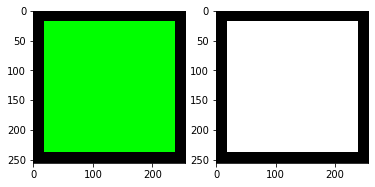

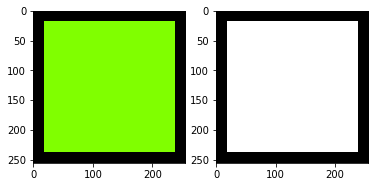

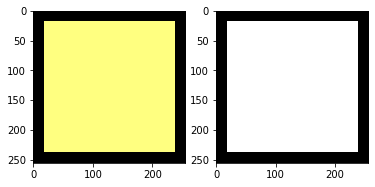

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt

# Create a black image
image = torch.zeros(size=(3, 256, 256), dtype=torch.int)

# Leave the borders and make the rest of the image Green to produce rgb code rgb(0, 255, 0)
image[1, 18:256 - 18, 18:256 - 18] = 255  

# Create a mask of the same size
mask = torch.zeros(size=(256, 256), dtype=torch.bool)

# Assuming the green region in the original image is the Region of interest, change the mask to white for that area
mask[18:256 - 18, 18:256 - 18] = 1

# Create a view of the mask with the same dimensions as the original image
mask_expanded = mask.expand_as(image)
print(mask_expanded.shape)

# to display an image it should be of format shape = (x,y,z) in comparison to what a tensor's shape is i.e (z,x,y)
# so, perform transpose after converting to numpy array

mask_np = mask_expanded.numpy().transpose(1, 2, 0) * 255 
print(mask_np[1][1][1])
image_np = image.numpy().transpose(1, 2, 0)
print(image_np.shape)
print(image_np[19][19][1])
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_np)
ax[1].imshow(mask_np)
plt.show()

image[0, mask] += 128
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_np)
ax[1].imshow(mask_np)
plt.show()

image[mask_expanded] += 128
image.clamp_(0, 255)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_np)
ax[1].imshow(mask_np)
plt.show()

In the example above, one can also find a couple of useful tricks:


*   `clamp` method and function is a Pytorch's analogue of NumPy's `clip` function
*   many operations on tensors have in-place form, that does not return modified data, but change values in the tensor. The in-place version of the operation has trailing underscore according to Pytorch's naming convension - in the exmaple above it is `clamp_`
*   tensors have the same indexing as Numpy's arrays - one can use `:` seperated range, negative indexes and so on.


.


---

# Images and their representations

Now, let's discuss images, their representations and how different Python librarties work with them. 

Probably, the most well-known library for image loading and simple processing is [Pillow](https://pillow.readthedocs.io/en/stable/). 

However, many people in deep learning area stick with OpenCV for image loading and processing with some usage of another libraries when it is justified by performance/functionality. This is because OpenCV is in general much faster than the other libraries. Here you can find a couple of benchmarks: 

*   https://www.kaggle.com/zfturbo/benchmark-2019-speed-of-image-reading
*   https://github.com/albumentations-team/albumentations#benchmarking-results

To sum up the benchmarks above, there are two most common image formats, PNG and JPEGs. If your data is in PNG format - use OpenCV to read it. If it is in JPEG - use libturbojpeg. For image processing, use OpenCV if possible. _We will be using PIL a lot along with these._

As you will read the code from others, you may find out that some of them use Pillow/something else to read data. You should know, that color image representations in OpenCV and other libraries are different - OpenCV uses "BGR" channel order, while others use "RGB" one. 

To change "BRG" <-> "RGB" the only thing we need to do it to change channel order.

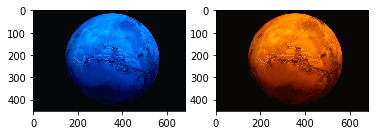

In [0]:
%matplotlib inline

# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image


bgr_image = url_to_image('https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRCA40ftnscVzfV8ft8e7vIzQXfXeZdtco8nknJrfCUW6INI40U')
# bgr_image = cv2.imread('https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRZpTmijaNOH6MmycM_eiPKcEl5mVvbwl7a8YKVGpEEMIanDcSt') 
# remember to add your own image in case you run this block, if you want to use the same image, 
# download it from: https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRCA40ftnscVzfV8ft8e7vIzQXfXeZdtco8nknJrfCUW6INI40U
rgb_image = bgr_image[..., ::-1]
fig, ax = plt.subplots(1, 2)
ax[0].imshow(bgr_image)
ax[1].imshow(rgb_image) # original image
plt.show()



---

## Question 10:

Looking at the results above it can be said that the pixel values in the blue channels would be very small compared to red channel. True/False?


---

Ans: False


# Autograd

Pytorch supports automatic differentiation. The module which implements this is called **AutoGrad**. It calculates the gradients and keeps track in forward and backward passes. For primitive tensors, you need to enable or disable it using the `required_grad` flag. But, for advanced tensors, it is enabled by default

In [0]:
a = torch.rand((3, 5), requires_grad = True)
print(a)
result = a * 5
print(result)

# grad can be implicitly created only for scalar outputs
# so let's calculate the sum here so that the output becomes a scalar and we can apply a backward pass
mean_result = result.sum()
print(mean_result)
# calculate gradient
mean_result.backward()
# print gradient of a
print(a.grad)
print(a)

tensor([[0.8948, 0.2556, 0.7809, 0.9732, 0.6847],
        [0.3076, 0.9759, 0.9288, 0.9359, 0.0698],
        [0.6890, 0.5161, 0.0719, 0.6695, 0.6571]], requires_grad=True)
tensor([[4.4742, 1.2778, 3.9045, 4.8661, 3.4233],
        [1.5378, 4.8797, 4.6442, 4.6793, 0.3491],
        [3.4450, 2.5803, 0.3597, 3.3475, 3.2855]], grad_fn=<MulBackward0>)
tensor(47.0541, grad_fn=<SumBackward0>)
tensor([[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.]])
tensor([[0.8948, 0.2556, 0.7809, 0.9732, 0.6847],
        [0.3076, 0.9759, 0.9288, 0.9359, 0.0698],
        [0.6890, 0.5161, 0.0719, 0.6695, 0.6571]], requires_grad=True)


In [0]:
np.sum([1.8365, 2.3827, 1.3032, 3.9060, 2.8554,2.2008, 1.2652, 4.8175, 2.4789, 2.6188,2.7512, 1.7930, 3.1524, 3.7307, 4.4118])

In [0]:
110/2

55.0



---

## Question 11: 

Why the gradient of a is all 5s above?



---



As we see, Pytorch automagically calculated the gradient value for us. It looks to be the correct value - we multiplied an input by 5, so the gradient of this operation equals to 5.

# Disabling Autograd for tensors

We don't need to compute gradients for all the variables that are involved in the pipeline. The Pytorch API provides 2 ways to disable autograd.

`detach` - returns a copy of the tensor with autograd disabled. This 

1.   copy is built on the same memory as the original tensor, so in-place size / stride / storage changes (such as resize_ / resizeas / set / transpose) modifications are not allowed.
2.   torch.no_grad() - It is a context manager that allows you to guard a series of operations from autograd without creating new tensors.

In [0]:
a = torch.rand((3, 5), requires_grad=True)
detached_a = a.detach()
detached_result = detached_a * 5
result = a * 10
# we cannot do backward pass that is required for autograd using multideminsional output,
# so let's calculate the sum here
mean_result = result.sum()
mean_result.backward()
a.grad

In [0]:
a = torch.rand((3, 5), requires_grad=True)
with torch.no_grad():
    detached_result = a * 5
result = a * 10
# we cannot do backward pass that is required for autograd using multideminsional output,
# so let's calculate the sum here
mean_result = result.sum()
mean_result.backward()
a.grad

# Custom Network

A fully-connected ReLU network with one hidden layer and no biases, trained to predict y from x by minimizing squared Euclidean distance.

This implementation uses PyTorch tensors to manually compute the forward pass, loss, and backward pass.

A PyTorch Tensor is basically the same as a numpy array: it does not know anything about deep learning or computational graphs or gradients, and is just a generic n-dimensional array to be used for arbitrary numeric computation.

The biggest difference between a numpy array and a PyTorch Tensor is that a PyTorch Tensor can run on either CPU or GPU. To run operations on the GPU, just cast the Tensor to a cuda datatype.

In [0]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Randomly initialize weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y

    # network:  x ---w1---> relu ---w2---> y_pred
    
    h = x.mm(w1)
    h_relu = h.clamp(min=0) # replaces all values below 0 as 0
    y_pred = h_relu.mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2*(y_pred - y) # derivative of loss w.r.t y_pred i.e change of y_pred that leads to change in loss
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
print(w1,w2)

0 27870400.0
1 21833706.0
2 18824586.0
3 16318100.0
4 13432960.0
5 10336553.0
6 7467559.0
7 5175940.5
8 3529160.25
9 2426408.5
10 1711155.5
11 1250420.875
12 948992.4375
13 745903.4375
14 603770.875
15 500344.0
16 422067.0
17 360810.625
18 311562.5
19 271068.03125
20 237241.5625
21 208650.140625
22 184213.375
23 163198.203125
24 144994.46875
25 129148.1796875
26 115303.421875
27 103161.7734375
28 92480.53125
29 83059.859375
30 74730.625
31 67342.9453125
32 60786.1171875
33 54950.85546875
34 49745.58203125
35 45089.5859375
36 40919.734375
37 37181.25390625
38 33822.08203125
39 30799.76953125
40 28079.818359375
41 25624.521484375
42 23406.80859375
43 21400.966796875
44 19581.611328125
45 17933.609375
46 16438.0703125
47 15079.216796875
48 13843.07421875
49 12717.8427734375
50 11692.5986328125
51 10757.1953125
52 9903.955078125
53 9123.400390625
54 8410.1875
55 7757.5439453125
56 7159.81884765625
57 6611.9013671875
58 6109.21435546875
59 5647.87158203125
60 5223.9189453125
61 4834.1845703



---
## Question 12

In the code above, why do we have 2 in '2.0*(y_pred - y)`?

Ans: it is derivative of the loss = (y_pred - y).pow(2) w.r.t y_pred

## Question 13
In the code above, what does `grad_h[h < 0] = 0` signify?

## Question 14
In the code above, how many "epochs" have we trained the model for? 

Ans: 500

## Question 15
In the code above, if we take the trained model, and run it on fresh  inputs, the trained model will be able to predict fresh output with high accuracy. 


Ans: no

In [0]:
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

h = x.mm(w1)
h_relu = h.clamp(min=0) # replaces all values below 0 as 0
y_pred = h_relu.mm(w2)

    # Compute and print loss
loss = (y_pred - y).pow(2).sum().item()
print(loss)

14749494.0



## Question 16
In the code above, if we dont use clone in `grad_h = grad_h_relu.clone()` the model will still train without any issues. 

Answers:

1 -  4

2 -   Increases 

3 -   Cutout makes the neural network look for other parts of object too.

4 - 1

5 -  0.5  

6 - No 

7 -  No

8 -  No

9 -  18

10 -  False

11 -     

12 - it is derivative of the loss = (y_pred - y).pow(2) w.r.t y_pred

13 -  

14 -  500

15 -  

16 -  

